## TIME SERIES EXPLORATORY DATA ANALYSIS OF S&P 500 (2013-2018)
#### BY: OLUWASEUN BADMUS

The goal of this analysis was to explore the S&P 500 stock data from 2013 to 2018. The S&P 500 is a widely recognized stock market benchmark index that represents the performance of 500 large-cap companies listed on the United States stock exchnages. We analyzed this dataset to find trends, patterns, and potential insights that could help us forecast future stock prices.

##  1. Data Collection

In [1]:
#load libraries
import pandas as pd 
import numpy as np  
import matplotlib.pylab as plt
import seaborn as sns

import plotly.express as px

#retrieve file names or pathnames matching a specified pattern
import glob

# Import the warnings module to handle warnings in Python
import warnings

# Use the filterwarnings() function from the warnings module
# to ignore all future warnings during the execution of the code
warnings.filterwarnings('ignore')



In [2]:
# Get a list of file paths matching the pattern
file_paths = glob.glob(r'/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/*csv')
file_paths

['/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/XRX_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/GS_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/SPGI_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/MTB_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/V_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/CTAS_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/ESRX_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/APH_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/BBT_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/RHI_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/GGP_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/HCA_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/HD_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/PEP_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/INTC_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_50

In [3]:
# Count the number of files
file_count = len(file_paths)

# Print the total number of files
print("Total number of files:", file_count)

Total number of files: 505


This analysis will focus on the four largest companies on the S&P 500 stock market index list.

In [4]:
# List of file paths for top companies' data in the S&P 500
top_companies = [
    r'/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/AAPL_data.csv',
    r'/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/MSFT_data.csv',
    r'/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/GOOGL_data.csv',
    r'/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/AMZN_data.csv'
]

In [5]:
# Create an empty DataFrame to store the combined data
all_data = pd.DataFrame()

# Loop through each file path in the top_companies list
for file_path in top_companies:
    # Read the data from the current file
    file_data = pd.read_csv(file_path)
    
    # Append the file data to the all_data DataFrame
    all_data = all_data.append(file_data, ignore_index=True)

In [6]:
# dimensions of all_data dataframe (rows, columns)
print('all_data dimensions:', all_data.shape)

all_data dimensions: (5036, 7)


In [7]:
# column names of the all_data dateframe
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

* Date: The date associated with the stock data entry.
* Open: The opening price of the stock on a particular trading day.
* High: The highest price the stock reached during the trading day.
* Low: The lowest price the stock reached during the trading day.
* Close: The closing price of the stock on a particular trading day.
* Volume: The number of shares traded for the stock on a particular trading day.
* Name: A unique symbol or abbreviation representing the stock of a company in the S&P 500 index.

In [8]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the all_data dataframe") 
all_data.head(5)

The first 5 rows of the all_data dataframe


date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [9]:
# Get the unique company names from the 'Name' column
unique_names = all_data['Name'].unique()
print("Unique ticker symbol:", unique_names)

Unique ticker symbol: ['AAPL' 'MSFT' 'GOOGL' 'AMZN']


In [10]:
# Create a copy of the original DataFrame
all_data_2 = all_data.copy()

Analyzing the change in the close price of the S&P 500 stock from 2013 to 2018 provides insight into the overall index's historical performance during that time period.

## 2. Analyzing the change in the close price of the stock over time 

We can understand the four largest companies index's overall trend, volatility, and potential patterns by studying the change in the close price of their S&P 500 stocks over time. This analysis aids in identifying periods of index growth, market downturns, or consolidation.

In [11]:
#Evaluating for Missing Data
missing_data = all_data.isnull()
#The output is a boolean value 
#"True" represents a missing value and "False" means the value is present in the dataset
missing_data

date   open   high    low  close  volume   Name
0     False  False  False  False  False   False  False
1     False  False  False  False  False   False  False
2     False  False  False  False  False   False  False
3     False  False  False  False  False   False  False
4     False  False  False  False  False   False  False
...     ...    ...    ...    ...    ...     ...    ...
5031  False  False  False  False  False   False  False
5032  False  False  False  False  False   False  False
5033  False  False  False  False  False   False  False
5034  False  False  False  False  False   False  False
5035  False  False  False  False  False   False  False

[5036 rows x 7 columns]

In [12]:
#Count missing values in each column
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
# Count the number of duplicated rows in the all_data DataFrame
duplicate_count = all_data.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [14]:
# Get the data types of each column in the all_data DataFrame
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [15]:
# Convert 'date' column to datetime format using the specified format string
all_data['date'] = pd.to_datetime(all_data['date'], format='%Y-%m-%d')

# Verify the data type of the 'date' column
print(all_data['date'].dtype)

datetime64[ns]


In [16]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [17]:
# statistical summary of the "close" column 
summary_stats = all_data['close'].describe()
summary_stats

count    5036.000000
mean      354.810917
std       326.079126
min        27.370000
25%        70.381200
50%       213.745000
75%       584.695000
max      1450.890000
Name: close, dtype: float64

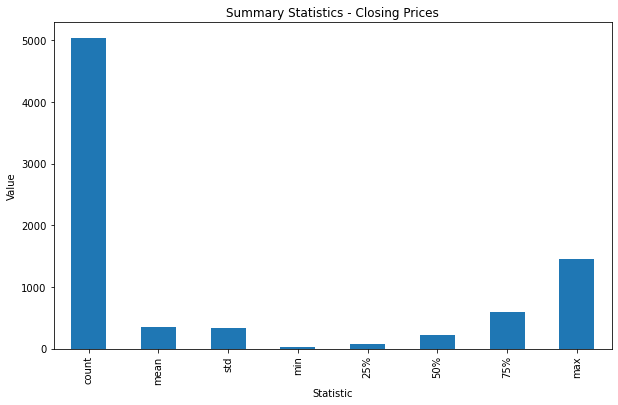

In [18]:
# Plotting the summary statistics for the 'close' column
plt.figure(figsize=(10, 6))
summary_stats.plot(kind='bar')
plt.title('Summary Statistics - Closing Prices')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

### Plot of the change in the close price of the stocks over time

In [19]:
top4_company = all_data['Name'].unique()
print('The ticker symbol for the top four companies on the S&P 500 index list:', top4_company)

The ticker symbol for the top four companies on the S&P 500 index list: ['AAPL' 'MSFT' 'GOOGL' 'AMZN']


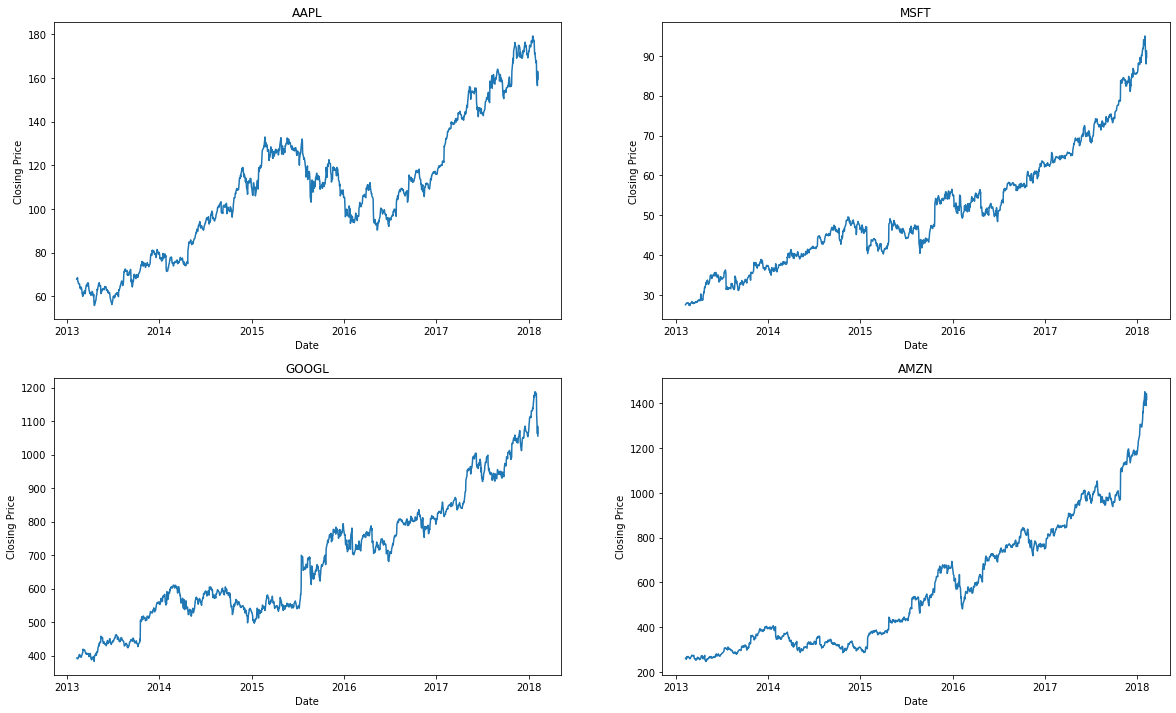

In [20]:
plt.figure(figsize=(20, 12))  # Set the figure size

# Iterate over each company in top4_company and create subplots
for index, company in enumerate(top4_company, 1):
    plt.subplot(2, 2, index)  # Create a subplot for each company
    
    SP = all_data['Name'] == company  # Filter data for the current company
    df = all_data[SP]
    
    plt.plot(df['date'], df['close'])  
    plt.title(company)  
    plt.xlabel('Date')  
    plt.ylabel('Closing Price') 


The analysis of the change in the close prices of AAPL, MSFT, GOOGL, and AMZN within the S&P 500 stock data for the years 2013 to 2018 revealed key insights into the stock performance of these companies. AAPL demonstrated growth with periodic dips and recoveries; MSFT exhibited steady growth with fewer significant corrections; GOOGL displayed consistent growth with occasional volatility; and AMZN showcased an exceptional growth trajectory with occasional periods of volatility.

## 2. Trend Analysis

In this trend analysis, we will look at the performance of four prominent stocks within the S&P 500 index from 2013 to 2018: AAPL (Apple Inc.), MSFT (Microsoft Corporation), GOOGL (Alphabet Inc. - Class A), and AMZN (Amazon.com Inc.). These stocks are major players in the technology and e-commerce industries, and they have had a significant impact on the overall market. Moving average and volume analysis were used as techniques in this analysis as part of a broader trend analysis.


In [21]:
all_data.head(14)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
5  2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL
6  2013-02-19  65.8714  66.1042  64.8356  65.7128  108854046  AAPL
7  2013-02-20  65.3842  65.3842  64.1142  64.1214  118891367  AAPL
8  2013-02-21  63.7142  64.1671  63.2599  63.7228  111596821  AAPL
9  2013-02-22  64.1785  64.5142  63.7999  64.4014   82583823  AAPL
10 2013-02-25  64.8356  65.0171  63.2242  63.2571   92899597  AAPL
11 2013-02-26  63.4028  64.5056  62.5228  64.1385  125096657  AAPL
12 2013-02-27  64.0614  64.6342  62.9499  63.5099  146674682  AAPL
13 2013-02-28  63.4357  63.9814  63.0571  63.0571   80532382  AAPL

In [22]:
# Calculate the 10-day rolling mean of the 'close' column and display the first 14 values
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

#### Moving average

Our primary objective was to examine the trends and gain insights by analyzing the moving averages of the four largest companies within the S&P 500: Apple (AAPL), Microsoft (MSFT), Alphabet (GOOGL), and Amazon (AMZN). For the moving average calculations, we used three different window sizes: 50, 100, and 200 days.

In [23]:
new_data = all_data.copy()

In [24]:
# List of different window sizes for moving averages
window_sizes = [50, 100, 200]

# Calculate and add moving average columns for each window size in ma_day
for window in window_sizes:
    # Create a new column with the moving average for the current window size
    new_data['close_' + str(window)] = new_data['close'].rolling(window).mean()

In [25]:
# Display the last 10 rows of the new_data DataFrame
new_data.tail(10)

date     open     high      low    close    volume  Name  \
5026 2018-01-25  1368.00  1378.34  1357.62  1377.95   4753012  AMZN   
5027 2018-01-26  1392.01  1402.53  1380.91  1402.05   4857310  AMZN   
5028 2018-01-29  1409.18  1431.39  1400.44  1417.68   5701898  AMZN   
5029 2018-01-30  1403.17  1439.25  1392.00  1437.82   5871942  AMZN   
5030 2018-01-31  1451.30  1472.58  1450.04  1450.89   6424693  AMZN   
5031 2018-02-01  1445.00  1459.88  1385.14  1390.00   9113808  AMZN   
5032 2018-02-02  1477.39  1498.00  1414.00  1429.95  11125722  AMZN   
5033 2018-02-05  1402.62  1458.98  1320.72  1390.00  11494985  AMZN   
5034 2018-02-06  1361.46  1443.99  1351.79  1442.84  11066819  AMZN   
5035 2018-02-07  1449.00  1460.99  1415.15  1416.78   7162741  AMZN   

       close_50  close_100   close_200  
5026  1203.0580  1104.8928  1038.51095  
5027  1208.5156  1109.1308  1041.00940  
5028  1214.1324  1113.6549  1043.61665  
5029  1220.3550  1118.3551  1046.38240  
5030  1226.6270  1123.0693  1049.12690  
5031  1231.8294  1127.3103  1051.55800  
5032  1237.9022  1131.8302  1054.21175  
5033  1242.9124  1135.9044  1056.65145  
5034  1248.6460  1140.3368  1059.37300  
5035  1253.2616  1144.5825  1061.91985

In [26]:
new_data.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
Name                 object
close_50            float64
close_100           float64
close_200           float64
dtype: object

In [27]:
# Set the 'date' column as the index of the DataFrame
new_data.set_index('date', inplace=True)

In [28]:
new_data

open       high        low      close     volume  Name  \
date                                                                      
2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL   
2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL   
2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL   
2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL   
2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL   
...               ...        ...        ...        ...        ...   ...   
2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN   
2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN   
2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN   
2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN   
2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN   

             close_50  close_100   close_200  
date                                          
2013-02-08        NaN        NaN         NaN  
2013-02-11        NaN        NaN         NaN  
2013-02-12        NaN        NaN         NaN  
2013-02-13        NaN        NaN         NaN  
2013-02-14        NaN        NaN         NaN  
...               ...        ...         ...  
2018-02-01  1231.8294  1127.3103  1051.55800  
2018-02-02  1237.9022  1131.8302  1054.21175  
2018-02-05  1242.9124  1135.9044  1056.65145  
2018-02-06  1248.6460  1140.3368  1059.37300  
2018-02-07  1253.2616  1144.5825  1061.91985  

[5036 rows x 9 columns]

In [29]:
# Retrieve the column names of the new_data dataframe
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_50',
       'close_100', 'close_200'],
      dtype='object')

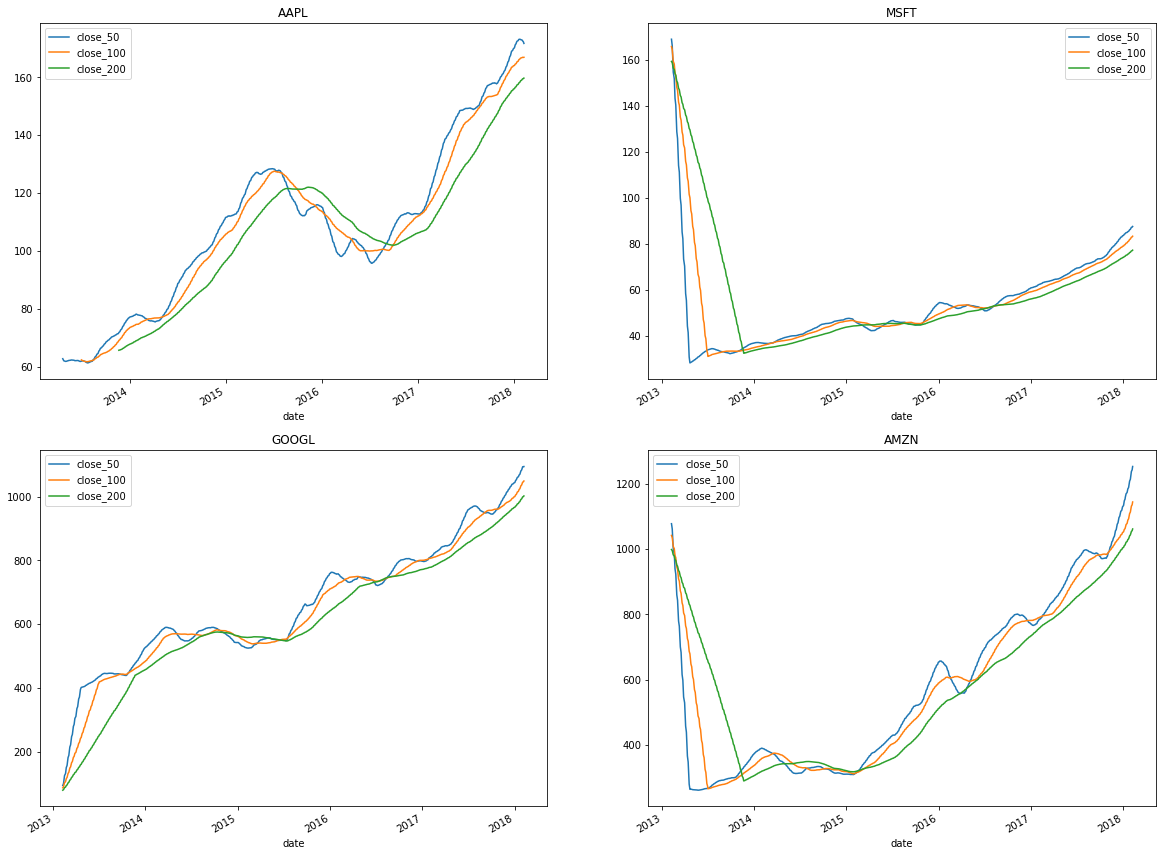

In [30]:
plt.figure(figsize=(20,16))

for index, company in enumerate(top4_company, 1):
    plt.subplot(2, 2, index)
    SP = new_data['Name']==company
    df = new_data[SP]
    df[['close_50','close_100', 'close_200']].plot(ax=plt.gca())
    plt.title(company)

The longer window sizes (100 and 200 days) smoothed out the fluctuations and indicated sustained growth, whereas the shorter window size (50) emphasized the volatility and occasional dips.

Overall, the moving average analysis revealed that all four companies experienced growth during the period from 2013 to 2018. However, the specific trends and volatility levels varied among the companies. AAPL and AMZN exhibited occasional fluctuations, while MSFT and GOOGL displayed more consistent upward trends.

### Volume analysis

The volume analysis focused on the trading volume associated with the stocks. The number of shares or contracts traded in a given period, such as a day, week, or month, is referred to as volume. Volume analysis can provide useful insights into market activity and investor participation.

In [31]:
# Create subplots for each company using plotly express
fig = px.line(new_data, y='volume', color='Name', 
              facet_col='Name',facet_col_wrap=2)

# Update the layout
fig.update_layout(height=600, width=950, legend_title_text='Company', 
                  title="Volume Analysis (2013-2018)",title_x=0.5)
#Adjust the annotation text to display only the company name
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])) 

# Show the plot
fig.show()

For each company, the volume analysis identified periods of significant volume spikes. These spikes indicate periods of increased trading activity, which could be caused by major news events, earnings announcements, or other market-moving catalysts. When the volume patterns of the four companies were compared, it revealed differences in trading activity. Some companies' trading volumes may have been consistently higher or lower than others, indicating differences in market interest or liquidity.


## 3. Seasonality analysis

In this analysis, we conducted a seasonality analysis of the S&P 500 stock data from 2013 to 2018. The goal was to identify any recurring patterns or trends in the stock market across different months and gain insight into potential seasonality effects on these companies' performance.

In [33]:
# Calculate monthly average returns for each stock
new_data['YearMonth'] = new_data.index.to_period('M')
new_data

open       high        low      close     volume  Name  \
date                                                                      
2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL   
2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL   
2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL   
2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL   
2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL   
...               ...        ...        ...        ...        ...   ...   
2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN   
2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN   
2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN   
2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN   
2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN   

             close_50  close_100   close_200 YearMonth  
date                                                    
2013-02-08        NaN        NaN         NaN   2013-02  
2013-02-11        NaN        NaN         NaN   2013-02  
2013-02-12        NaN        NaN         NaN   2013-02  
2013-02-13        NaN        NaN         NaN   2013-02  
2013-02-14        NaN        NaN         NaN   2013-02  
...               ...        ...         ...       ...  
2018-02-01  1231.8294  1127.3103  1051.55800   2018-02  
2018-02-02  1237.9022  1131.8302  1054.21175   2018-02  
2018-02-05  1242.9124  1135.9044  1056.65145   2018-02  
2018-02-06  1248.6460  1140.3368  1059.37300   2018-02  
2018-02-07  1253.2616  1144.5825  1061.91985   2018-02  

[5036 rows x 10 columns]

In [34]:
monthly_returns = new_data.groupby(['YearMonth','Name']).mean()
monthly_returns.reset_index(inplace=True)
monthly_returns.set_index('YearMonth', inplace=True)
monthly_returns

Name         open         high          low        close  \
YearMonth                                                              
2013-02     AAPL    65.660957    66.221671    64.803536    65.306264   
2013-02     AMZN   264.086429   267.339571   260.826143   263.995000   
2013-02    GOOGL   396.084636   399.101914   393.843950   396.413514   
2013-02     MSFT    27.775007    27.955000    27.593214    27.777500   
2013-03     AAPL    63.144435    63.829005    62.476795    63.120110   
...          ...          ...          ...          ...          ...   
2018-01     MSFT    89.965952    90.657486    89.372143    90.075238   
2018-02     AAPL   162.036000   165.284000   159.185700   161.468000   
2018-02     AMZN  1427.094000  1464.368000  1377.360000  1413.914000   
2018-02    GOOGL  1104.594000  1121.530000  1084.380000  1100.604000   
2018-02     MSFT    91.274000    93.305000    89.506260    90.996000   

                 volume     close_50    close_100    close_200  
YearMonth                                                       
2013-02    1.151152e+08          NaN          NaN          NaN  
2013-02    3.432535e+06   977.581829   997.849450   977.273489  
2013-02    4.675698e+06   134.272540   107.359984    89.521603  
2013-02    3.994003e+07   150.249657   157.378457   155.311236  
2013-03    1.144458e+08          NaN          NaN          NaN  
...                 ...          ...          ...          ...  
2018-01    2.734564e+07    85.138610    80.693990    75.349333  
2018-02    6.528311e+07   172.316560   166.946520   159.590850  
2018-02    9.992815e+06  1242.910320  1135.992840  1056.742810  
2018-02    4.034784e+06  1093.542760  1046.327840   999.953780  
2018-02    5.104665e+07    87.288320    83.023940    77.047250  

[244 rows x 9 columns]

In [35]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]

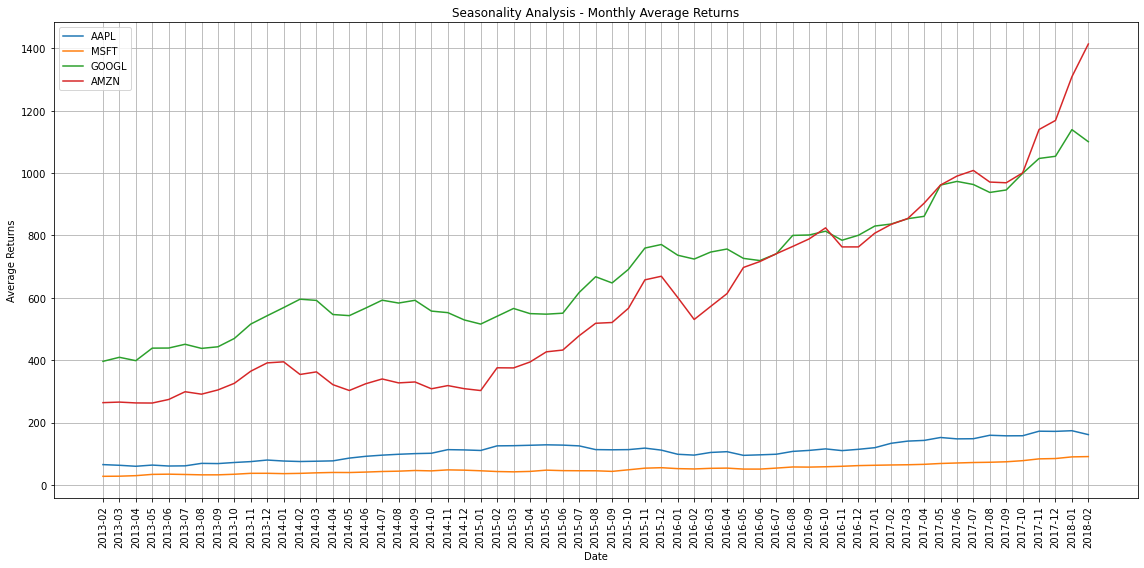

In [36]:
# Plotting the seasonality patterns
plt.figure(figsize=(16, 8))

for ticker in tickers:
    ticker_df = monthly_returns[monthly_returns.Name==ticker]
    plt.plot(ticker_df.index.astype(str), ticker_df['close'], label=ticker)

plt.title('Seasonality Analysis - Monthly Average Returns')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

The seasonality analysis of the S&P 500 stock data for AAPL, MSFT, GOOGL, and AMZN during the years 2013 to 2018 revealed distinct monthly patterns and trends in the stock market. Recognizing these seasonality effects may allow investors to improve their investment strategies and make more informed decisions. Understanding the periods of potential market outperformance or underperformance associated with each company can help investors optimize their portfolios and capitalize on stock market seasonal trends.

## 4. Analysis on the Apple (AAPL) stock

An in-depth analysis of the APPL S&P stock was performed, focusing on key aspects such as daily returns, volatility, resampling, and the relative strength index (RSI). The purpose of this analysis was to gain insight into the APPL stock's performance, risk, and market dynamics over the specified timeframe.

In [37]:
# Filter the all_data DataFrame to create a new DataFrame for Apple Inc. (AAPL)
apple = all_data[all_data.Name == "AAPL"]
apple.head(5)

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [38]:
apple.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [39]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

### AAPL Daily Returns

In [40]:
# Calculate the daily return in percentage

# pct_change() computes the percentage change between the current value and the previous value

apple['Daily return(in %)'] = apple['close'].pct_change() * 100


In [41]:
apple.head(5)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297  
4           -0.089934

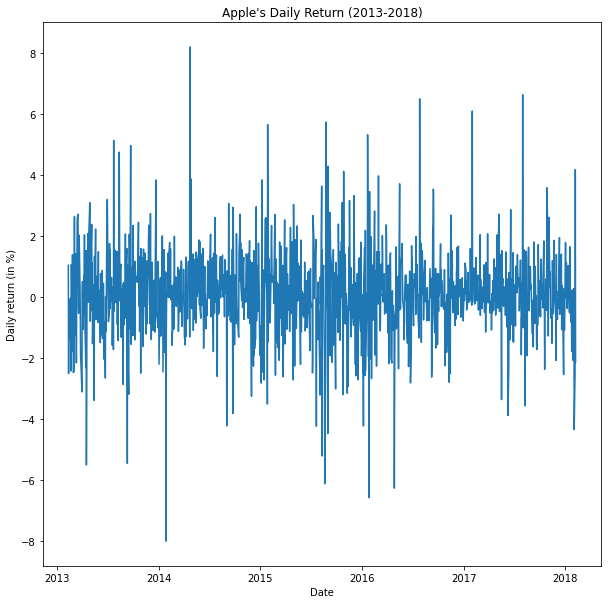

In [42]:
plt.figure(figsize=(10,10))

# Create a line plot of Apple's daily return
plt.plot(apple['date'], apple['Daily return(in %)'])
plt.xlabel('Date')
plt.ylabel('Daily return (in %)')
plt.title("Apple's Daily Return (2013-2018)")
plt.show()

In [43]:
#now making the plot interactive using plotly
fig = px.line(apple, x="date", y="Daily return(in %)") 
fig.update_layout(title="Apple's Daily Return (2013-2018)",title_x=0.5)

fig.show()

The daily returns plot for AAPL showed a mix of positive and negative values, indicating fluctuations in its daily performance. The overall trend showed periods of growth followed by periodic corrections. This analysis emphasizes the potential volatility of AAPL's stock and the importance of managing investments carefully in response to these fluctuations.

## Volatility analysis of APPL

The daily returns analysis may additionally identify information about the volatility and risk associated with AAPL's stock. Higher daily return fluctuations indicate greater volatility, indicating a potentially riskier investment. 

In [44]:
# Calculate daily returns
apple['Daily return'] = apple['close'].pct_change()

# Calculate rolling standard deviation with a window of 30 days
#apple['Volatility'] = apple['Daily return'].rolling(window=30).std()

# Calculate rolling standard deviation
window_size = 252  # Number of trading days in a year (considering 252)
apple['Volatility'] = apple['Daily return'].rolling(window_size).std() * np.sqrt(window_size)


apple


date      open      high       low     close     volume  Name  \
0    2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1    2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2    2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3    2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4    2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...         ...       ...       ...       ...       ...        ...   ...   
1254 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      Daily return(in %)  Daily return  Volatility  
0                    NaN           NaN         NaN  
1               1.042235      0.010422         NaN  
2              -2.506658     -0.025067         NaN  
3              -0.190297     -0.001903         NaN  
4              -0.089934     -0.000899         NaN  
...                  ...           ...         ...  
1254            0.209043      0.002090    0.176941  
1255           -4.339015     -0.043390    0.182433  
1256           -2.498442     -0.024984    0.184234  
1257            4.179181      0.041792    0.188545  
1258           -2.140710     -0.021407    0.189669  

[1259 rows x 10 columns]

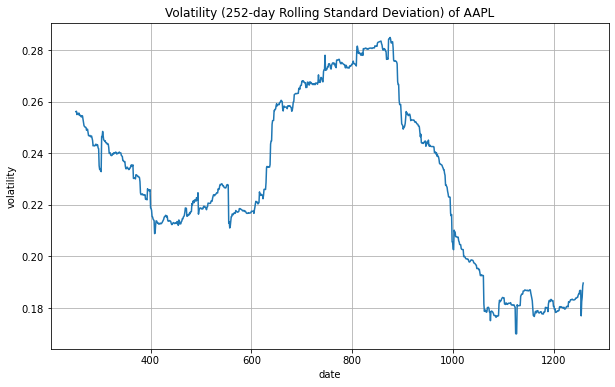

In [45]:
# Plotting the volatility
plt.figure(figsize=(10, 6))
plt.plot(apple['Volatility'])
plt.title('Volatility (252-day Rolling Standard Deviation) of AAPL')
plt.xlabel('date')
plt.ylabel('volatility')
plt.grid(True)
plt.show()

The volatility plot of AAPL over time revealed periods of higher and lower volatility. These fluctuations reflect the market's reaction to a variety of factors, including earnings reports, product launches, market sentiment, and broader economic conditions. Identifying these patterns allows investors to better understand the risks associated with AAPL stock and adjust their investment strategies accordingly.

## Resampling analysis of AAPL closing price 

We conducted a resampling analysis of Apple's (AAPL) closing price data in this analysis. The goal was to examine the data at various time intervals in order to gain insights into the overall trends, patterns, and potential changes in the stock's performance over time.

In [46]:
print(apple['date'].dtype)

datetime64[ns]


In [47]:
# Set the 'date' column as the index of the DataFrame
apple.set_index('date', inplace=True)

In [48]:
apple.head(5)

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily return(in %)  Daily return  Volatility  
date                                                      
2013-02-08                 NaN           NaN         NaN  
2013-02-11            1.042235      0.010422         NaN  
2013-02-12           -2.506658     -0.025067         NaN  
2013-02-13           -0.190297     -0.001903         NaN  
2013-02-14           -0.089934     -0.000899         NaN

In [49]:
# Perform resampling analysis on the Apple stocks closing price

In [50]:
# Resampling analysis - Yearly
AAPL_yearly_closing_price = apple['close'].resample('Y').mean()
print(AAPL_yearly_closing_price)

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64


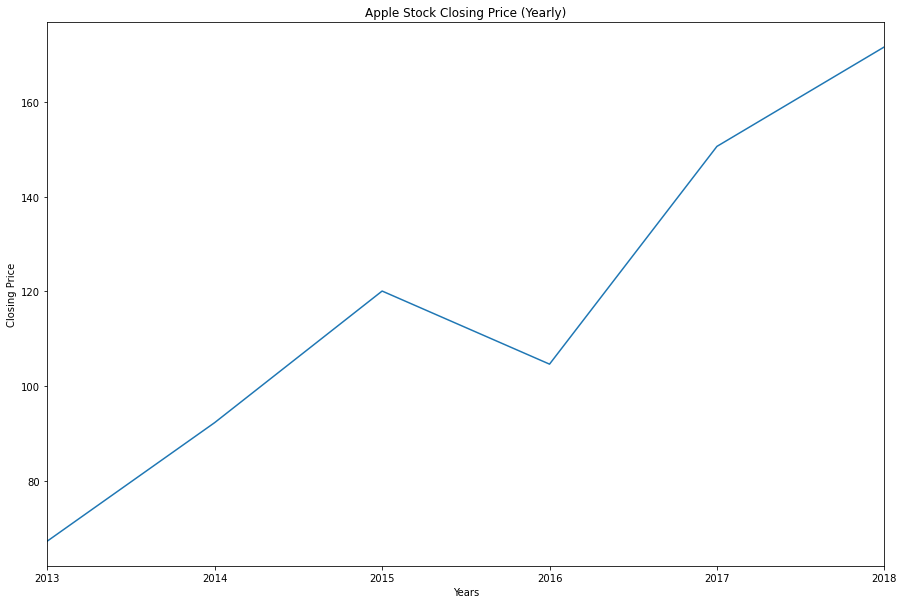

In [51]:
# Visualize the apple stocks clsoing price on Yearly basis

plt.figure(figsize=(15,10))

AAPL_yearly_closing_price.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title("Apple Stock Closing Price (Yearly)")

plt.show()

In [52]:
# Resampling analysis of apple stocks - Quarterly
AAPL_quaterly_closing_price = apple['close'].resample('Q').mean()
print(AAPL_quaterly_closing_price)

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303437
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64


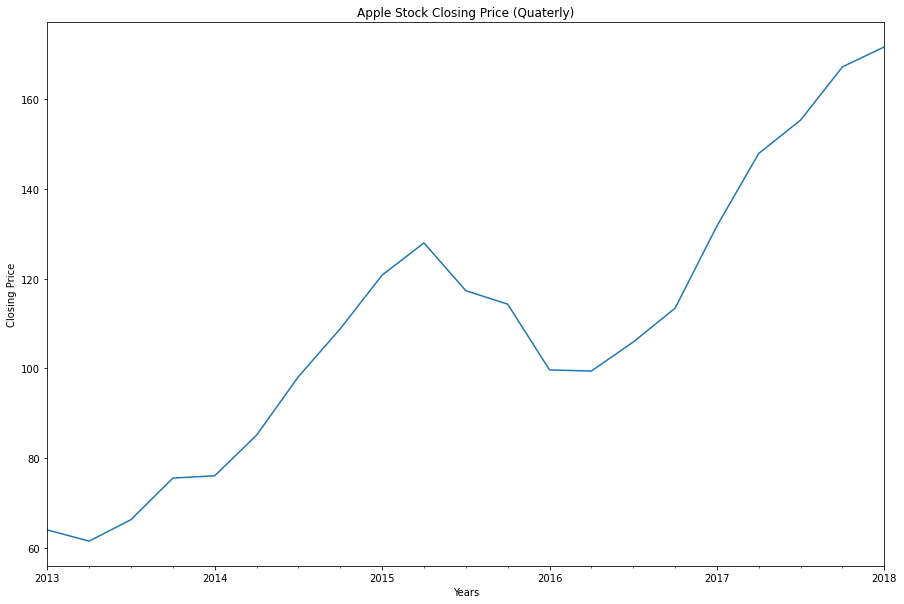

In [53]:
# Visualize the apple stocks clsoing price on Quaterly basis

plt.figure(figsize=(15,10))

AAPL_quaterly_closing_price.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title("Apple Stock Closing Price (Quaterly)")

plt.show()

In [54]:
# Resampling analysis of apple stocks - Monthly
AAPL_monthly_closing_price = apple['close'].resample('M').mean()
print(AAPL_monthly_closing_price)

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64


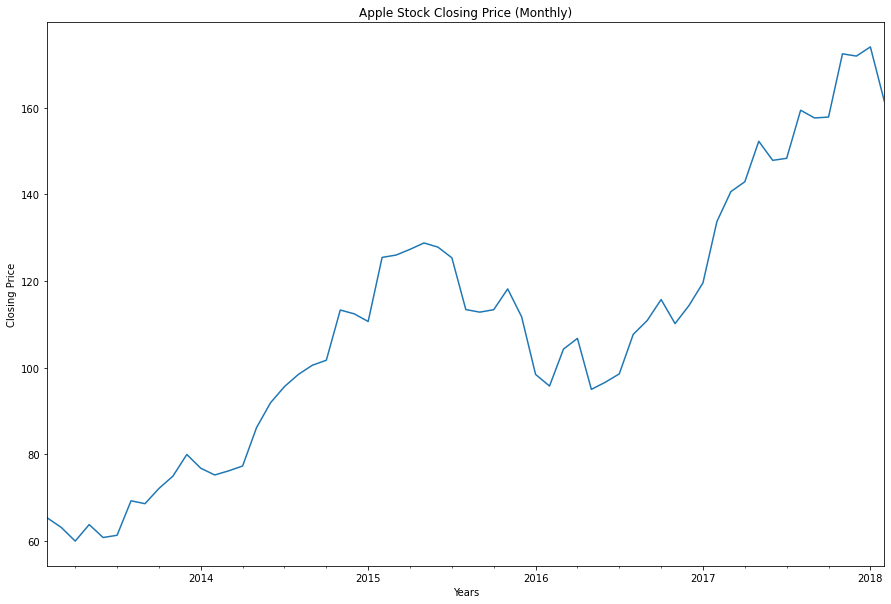

In [55]:
# Visualize the apple stocks clsoing price on Yearly basis

plt.figure(figsize=(15,10))

AAPL_monthly_closing_price.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title("Apple Stock Closing Price (Monthly)")

plt.show()

We can observe the long-term trend of AAPL's closing price by resampling the data at different time intervals, such as monthly, quarterly, or yearly. The plot indicates whether the stock experienced an upward or downward trend during the time period under consideration.

## Relative Strength Index of AAPL

In this analysis, we calculated the Relative Strength Index (RSI) of Apple's (AAPL) stock using S&P 500 data from 2013 to 2018. The RSI is a momentum oscillator that measures price movement speed and change. The goal was to gain insight into the strength and potential turning points of AAPL's stock during the time period under consideration.


In [56]:
apple.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily return(in %)  Daily return  Volatility  
date                                                      
2013-02-08                 NaN           NaN         NaN  
2013-02-11            1.042235      0.010422         NaN  
2013-02-12           -2.506658     -0.025067         NaN  
2013-02-13           -0.190297     -0.001903         NaN  
2013-02-14           -0.089934     -0.000899         NaN

In [57]:
# Calculate price change
apple['price change'] = apple['close'].diff()

# Calculate gain and loss
apple['Gain'] = apple['price change'].apply(lambda x: x if x > 0 else 0)
apple['Loss'] = apple['price change'].apply(lambda x: abs(x) if x < 0 else 0)

# Calculate average gain and loss using a rolling window
window = 14  # Number of periods to consider
apple['Average Gain'] = apple['Gain'].rolling(window).mean()
apple['Average Loss'] = apple['Loss'].rolling(window).mean()

# Calculate relative strength
apple['RS'] = apple['Average Gain'] / apple['Average Loss']

# Calculate relative strength index (RSI)
apple['RSI'] = 100 - (100 / (1 + apple['RS']))

In [58]:
apple.tail(10)

open      high       low   close    volume  Name  \
date                                                              
2018-01-25  174.505  174.9500  170.5300  171.11  41529004  AAPL   
2018-01-26  172.000  172.0000  170.0600  171.51  39143011  AAPL   
2018-01-29  170.160  170.1600  167.0700  167.96  50640406  AAPL   
2018-01-30  165.525  167.3700  164.7000  166.97  46048185  AAPL   
2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

            Daily return(in %)  Daily return  Volatility  price change  Gain  \
date                                                                           
2018-01-25           -1.785099     -0.017851    0.185415         -3.11  0.00   
2018-01-26            0.233768      0.002338    0.185415          0.40  0.40   
2018-01-29           -2.069850     -0.020699    0.186725         -3.55  0.00   
2018-01-30           -0.589426     -0.005894    0.186824         -0.99  0.00   
2018-01-31            0.275499      0.002755    0.186794          0.46  0.46   
2018-02-01            0.209043      0.002090    0.176941          0.35  0.35   
2018-02-02           -4.339015     -0.043390    0.182433         -7.28  0.00   
2018-02-05           -2.498442     -0.024984    0.184234         -4.01  0.00   
2018-02-06            4.179181      0.041792    0.188545          6.54  6.54   
2018-02-07           -2.140710     -0.021407    0.189669         -3.49  0.00   

            Loss  Average Gain  Average Loss        RS        RSI  
date                                                               
2018-01-25  3.11      0.562857      0.700000  0.804082  44.570136  
2018-01-26  0.00      0.450714      0.700000  0.643878  39.168218  
2018-01-29  3.55      0.450714      0.907143  0.496850  33.193056  
2018-01-30  0.99      0.450714      0.976429  0.461595  31.581582  
2018-01-31  0.00      0.483571      0.973571  0.496698  33.186275  
2018-02-01  0.00      0.437857      0.973571  0.449743  31.022267  
2018-02-02  7.28      0.308571      1.493571  0.206600  17.122473  
2018-02-05  4.01      0.308571      1.715714  0.179850  15.243472  
2018-02-06  0.00      0.567857      1.715714  0.330974  24.867063  
2018-02-07  3.49      0.556429      1.965000  0.283170  22.067989

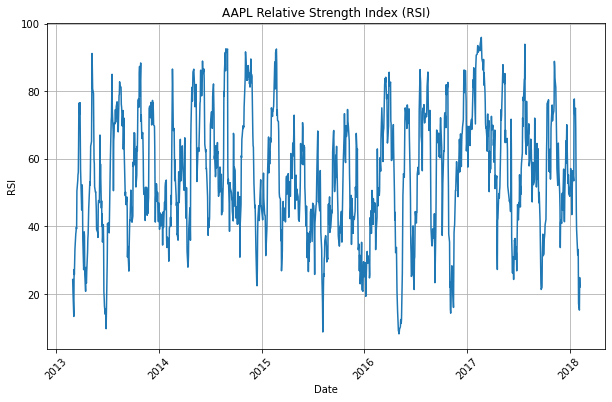

In [59]:
# Plot the AAPL RSI
plt.figure(figsize=(10, 6))
plt.plot(apple['RSI'])
plt.title('AAPL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From 2013 to 2018, the RSI analysis of Apple's (AAPL) stock in the S&P 500 stock market index provided insights into the stock's strength, potential reversals, and momentum.

## 5. Correlation analysis of the top companies

In this study, we used stock data from the years 2013 to 2018 to conduct a correlation analysis of the closing prices for the S&P 500 stock market index. Examining the relationships between the stock closing prices of the top four index companies—Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN)—was the main objective. The goal was to determine the relationships and dependencies between these stocks and learn more about how they interacted with one another within the S&P 500 index.

In [60]:
all_data

date       open       high        low      close     volume  Name
0    2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL
1    2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL
2    2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL
3    2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL
4    2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL
...         ...        ...        ...        ...        ...        ...   ...
5031 2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN
5032 2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN
5033 2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN
5034 2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN
5035 2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN

[5036 rows x 7 columns]

In [61]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [62]:
top_companies

['/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/AAPL_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/MSFT_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/GOOGL_data.csv',
 '/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/AMZN_data.csv']

In [63]:
top_companies[0]

'/Users/seun/Desktop/5yr_dataset_S&P_500_stocks/AAPL_data.csv'

In [64]:
aapl  = pd.read_csv(top_companies[0])
msft  = pd.read_csv(top_companies[1])
googl = pd.read_csv(top_companies[2])
amzn  = pd.read_csv(top_companies[3])

In [65]:
# Create a DataFrame with closing prices for each company
closing_price = pd.DataFrame({
    'aapl_close': aapl['close'],
    'msft_close': msft['close'],
    'googl_close': googl['close'],
    'amzn_close': amzn['close']
})

In [66]:
# Display the closing_price DataFrame
closing_price

aapl_close  msft_close  googl_close  amzn_close
0        67.8542       27.55     393.0777      261.95
1        68.5614       27.86     391.6012      257.21
2        66.8428       27.88     390.7403      258.70
3        66.7156       28.03     391.8214      269.47
4        66.6556       28.04     394.3039      269.24
...          ...         ...          ...         ...
1254    167.7800       94.26    1181.5900     1390.00
1255    160.5000       91.78    1119.2000     1429.95
1256    156.4900       88.00    1062.3900     1390.00
1257    163.0300       91.33    1084.4300     1442.84
1258    159.5400       89.61    1055.4100     1416.78

[1259 rows x 4 columns]

### Pairplot

1. The closing price of each company is plotted against each other using the pairplot, which generates a grid of scatterplots. Usually, the grid's diagonal displays the distribution of each company's closing price.

2. Each grid cell displays a scatterplot illustrating the relationship between the two companies closing prices. The scatterplot points represent the values of the two variables for each data point in the dataset.

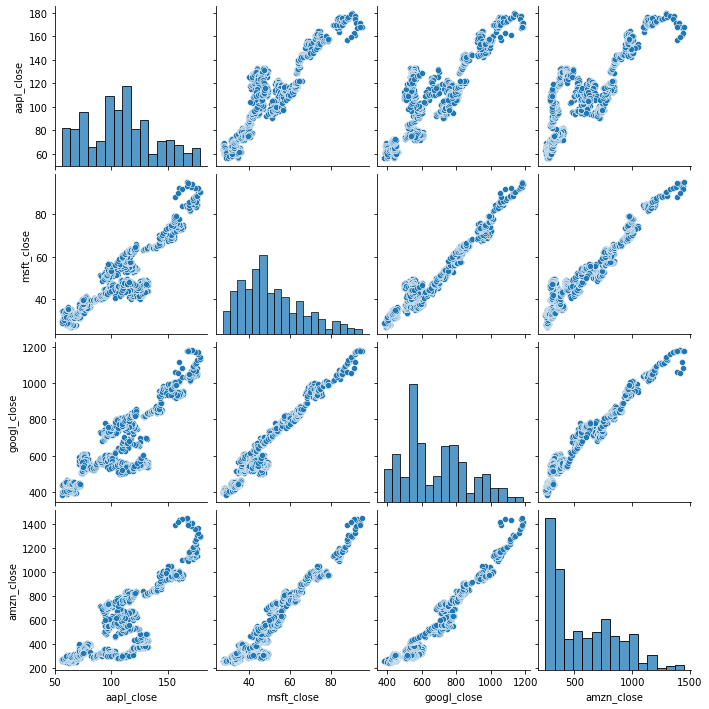

In [67]:
sns.pairplot(closing_price)

In [68]:
closing_price.corr()

aapl_close  msft_close  googl_close  amzn_close
aapl_close     1.000000    0.899689     0.843736    0.819078
msft_close     0.899689    1.000000     0.970779    0.955977
googl_close    0.843736    0.970779     1.000000    0.973988
amzn_close     0.819078    0.955977     0.973988    1.000000

### Heatmap

<AxesSubplot:>

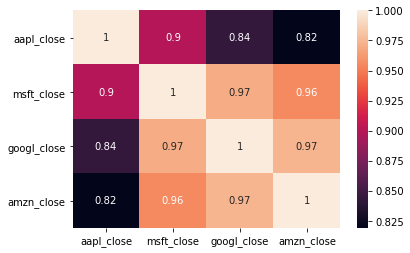

In [69]:
sns.heatmap(closing_price.corr(), annot=True)

These findings suggest that, with varying degrees of strength, there is a generally positive relationship between the closing prices of these four companies' stocks. A higher correlation coefficient indicates a stronger correlation in their price movements, implying that changes in the price of one stock are likely to be accompanied by similar changes in the price of the other stock.


